# IMPORTING LIBRARIES

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [38]:
df=pd.read_csv('//kaggle/input/coin-currency/coin_Tether.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Tether,USDT,2015-02-26 23:59:59,1.212320,1.194710,1.210420,1.205740,5.955460,303364.1840
1,2,Tether,USDT,2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500,152595.9032
2,3,Tether,USDT,2015-03-03 23:59:59,0.606229,0.604416,0.605129,0.606229,3.031130,152527.2164
3,4,Tether,USDT,2015-03-06 23:59:59,1.000000,1.000000,1.000000,1.000000,92.647202,251600.0000
4,5,Tether,USDT,2015-03-07 23:59:59,1.000000,1.000000,1.000000,1.000000,58196.800781,251600.0000


# ANALYSING DATASET

In [39]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2.318000e+03,2.318000e+03
mean,1159.500000,1.006776,0.995670,1.000656,1.000696,1.938484e+10,6.128741e+09
std,669.293284,0.018511,0.016425,0.015449,0.014951,3.485057e+10,1.262068e+10
min,1.000000,0.606229,0.568314,0.571249,0.606229,1.104970e-01,1.525272e+05
25%,580.250000,1.000000,0.994445,1.000000,1.000000,9.858018e+05,6.951590e+06
50%,1159.500000,1.003205,0.999677,1.000010,1.000020,2.507340e+09,2.021074e+09
75%,1738.750000,1.011339,1.000000,1.002278,1.002228,2.460318e+10,4.133154e+09
max,2318.000000,1.212320,1.194710,1.210420,1.205740,2.790675e+11,6.274650e+10


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,2318.0,1.159500e+03,6.692933e+02,1.000000,5.802500e+02,1.159500e+03,1.738750e+03,2.318000e+03
High,2318.0,1.006776e+00,1.851054e-02,0.606229,1.000000e+00,1.003205e+00,1.011339e+00,1.212320e+00
Low,2318.0,9.956704e-01,1.642531e-02,0.568314,9.944446e-01,9.996770e-01,1.000000e+00,1.194710e+00
Open,2318.0,1.000656e+00,1.544869e-02,0.571249,1.000000e+00,1.000010e+00,1.002278e+00,1.210420e+00
Close,2318.0,1.000696e+00,1.495058e-02,0.606229,1.000000e+00,1.000020e+00,1.002228e+00,1.205740e+00
Volume,2318.0,1.938484e+10,3.485057e+10,0.110497,9.858018e+05,2.507340e+09,2.460318e+10,2.790675e+11
Marketcap,2318.0,6.128741e+09,1.262068e+10,152527.216400,6.951590e+06,2.021074e+09,4.133154e+09,6.274650e+10


1. The dataset shows significant variation across different metrics, particularly in volume and market capitalization. The high and low values, as well as the opening and closing values, are relatively stable, with small variations.
2. This suggests that while the price values do not fluctuate wildly, the volume and market capitalization can vary greatly, indicating periods of higher and lower trading activity.

In [41]:
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [42]:
df.index = pd.to_datetime(df['Date'])
df.index

DatetimeIndex(['2015-02-26 23:59:59', '2015-03-02 23:59:59',
               '2015-03-03 23:59:59', '2015-03-06 23:59:59',
               '2015-03-07 23:59:59', '2015-03-08 23:59:59',
               '2015-03-09 23:59:59', '2015-03-10 23:59:59',
               '2015-03-11 23:59:59', '2015-03-12 23:59:59',
               ...
               '2021-06-27 23:59:59', '2021-06-28 23:59:59',
               '2021-06-29 23:59:59', '2021-06-30 23:59:59',
               '2021-07-01 23:59:59', '2021-07-02 23:59:59',
               '2021-07-03 23:59:59', '2021-07-04 23:59:59',
               '2021-07-05 23:59:59', '2021-07-06 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=2318, freq=None)

In [43]:
new_df=df.drop(['SNo', 'Symbol', 'Name','Date'], axis=1)

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2318 entries, 2015-02-26 23:59:59 to 2021-07-06 23:59:59
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2318 non-null   float64
 1   Low        2318 non-null   float64
 2   Open       2318 non-null   float64
 3   Close      2318 non-null   float64
 4   Volume     2318 non-null   float64
 5   Marketcap  2318 non-null   float64
dtypes: float64(6)
memory usage: 126.8 KB


In [45]:
new_df.index.min()

Timestamp('2015-02-26 23:59:59')

In [46]:
new_df.index.max()

Timestamp('2021-07-06 23:59:59')

In [47]:
new_df.head()

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2015-02-26 23:59:59,1.212320,1.194710,1.210420,1.205740,5.955460,303364.1840
2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500,152595.9032
2015-03-03 23:59:59,0.606229,0.604416,0.605129,0.606229,3.031130,152527.2164
2015-03-06 23:59:59,1.000000,1.000000,1.000000,1.000000,92.647202,251600.0000
2015-03-07 23:59:59,1.000000,1.000000,1.000000,1.000000,58196.800781,251600.0000


In [48]:
new_df.tail()

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2021-07-02 23:59:59,1.000830,0.999991,1.000301,1.000033,4.562659e+10,6.237592e+10
2021-07-03 23:59:59,1.000674,0.999914,1.000046,0.999956,4.119499e+10,6.237115e+10
2021-07-04 23:59:59,1.000165,0.998902,0.999987,0.999501,4.306666e+10,6.234274e+10
2021-07-05 23:59:59,1.001040,0.999426,0.999426,1.000667,4.721585e+10,6.241550e+10
2021-07-06 23:59:59,1.000879,0.999825,1.000728,1.000090,5.105419e+10,6.233384e+10


# FEATURE SELECTION

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
all_features = ['High', 'Low', 'Open', 'Volume', 'Marketcap']
X = new_df[all_features]
y = new_df['Close']  

In [51]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

In [52]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, all_features[indices[f]], feature_importances[indices[f]]))

Feature ranking:
1. feature High (0.431400)
2. feature Open (0.189569)
3. feature Low (0.183214)
4. feature Marketcap (0.165394)
5. feature Volume (0.030423)


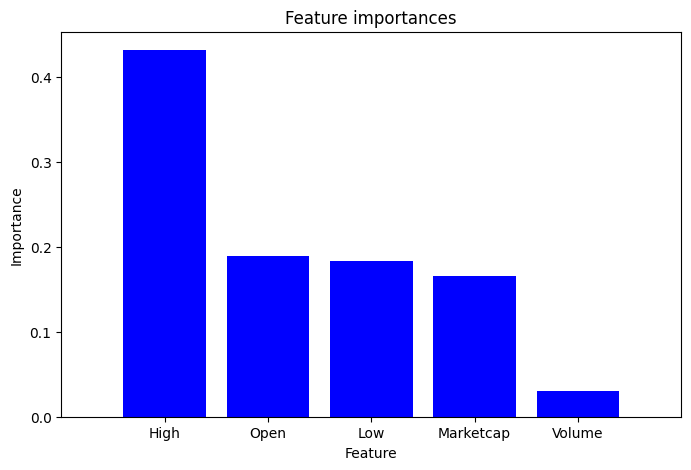

In [53]:
plt.figure(figsize=(8,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [all_features[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

Feature selection confirm that all these fetures are important,as we already take them for our training and drop rest of them

# VISUALIZATION

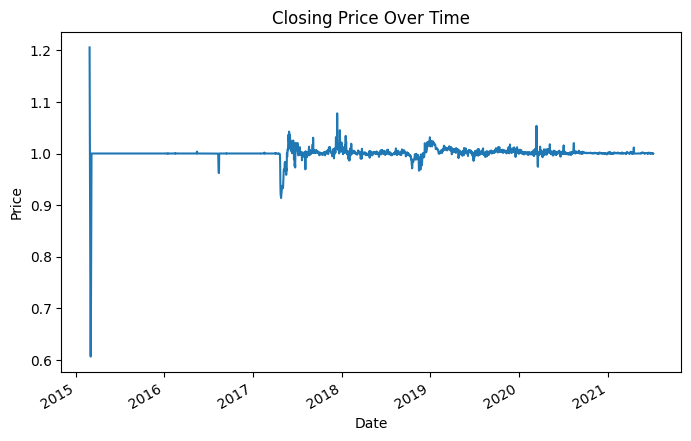

In [54]:
new_df['Close'].plot(figsize=(8, 5))
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

> price of tether coin remains constant through out the dataset, just a spike at beginning because at that time coin listed at trading forum

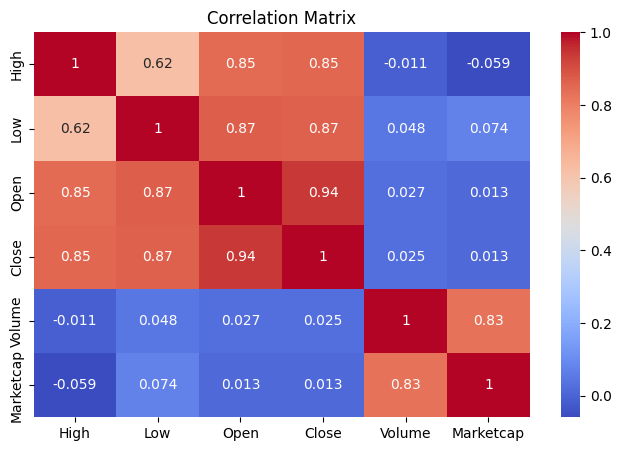

In [55]:
corr_matrix = new_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

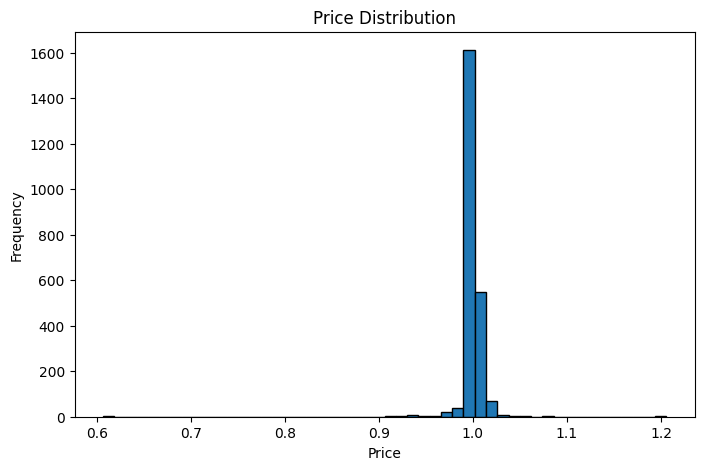

In [56]:
plt.figure(figsize=(8,5))
plt.hist(new_df['Close'], bins=50, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

> distribution of price of tether coin remains constant through out the dataset

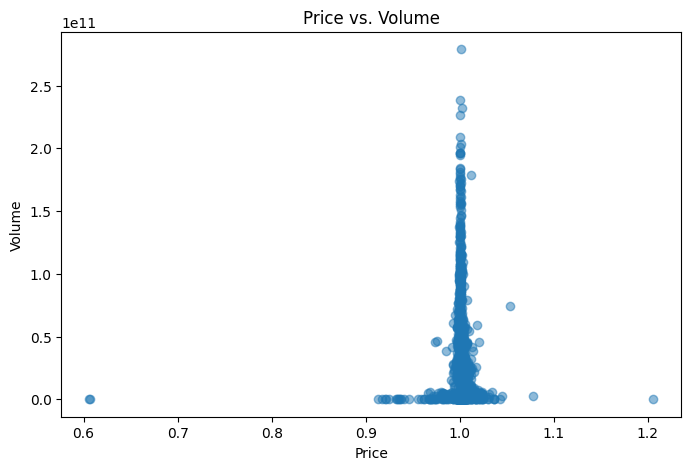

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(new_df['Close'], new_df['Volume'], alpha=0.5)
plt.title('Price vs. Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()

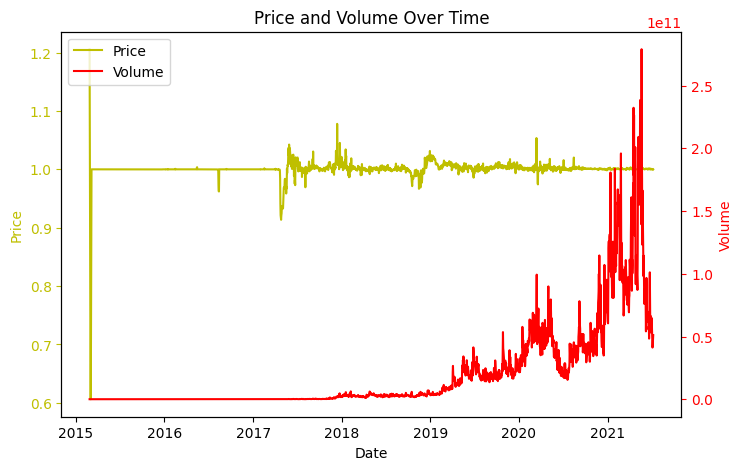

In [58]:
fig, ax1 = plt.subplots(figsize=(8,5))


ax1.plot(new_df['Close'], color='y', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='y')
ax1.tick_params('y', colors='y')


ax2 = ax1.twinx()
ax2.plot(new_df['Volume'], color='r', label='Volume')
ax2.set_ylabel('Volume', color='r')
ax2.tick_params('y', colors='r')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Price and Volume Over Time')
plt.show()

> price of coin remains constant even though the volume of coin keep increasing

# MODEL SELECTION

**SPLITTING DATA FOR TESTING AND TRAINING**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1854 entries, 2020-08-12 23:59:59 to 2017-07-10 23:59:59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1854 non-null   float64
 1   Low        1854 non-null   float64
 2   Open       1854 non-null   float64
 3   Volume     1854 non-null   float64
 4   Marketcap  1854 non-null   float64
dtypes: float64(5)
memory usage: 86.9 KB


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464 entries, 2018-01-06 23:59:59 to 2019-02-22 23:59:59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       464 non-null    float64
 1   Low        464 non-null    float64
 2   Open       464 non-null    float64
 3   Volume     464 non-null    float64
 4   Marketcap  464 non-null    float64
dtypes: float64(5)
memory usage: 21.8 KB


In [62]:
X_test.head()

,High,Low,Open,Volume,Marketcap
Date,,,,,
2018-01-06 23:59:59,1.01209,0.996847,1.00028,2.620080e+09,1.481288e+09
2016-09-01 23:59:59,1.00000,1.000000,1.00000,8.383780e+05,6.951591e+06
2015-06-11 23:59:59,1.00000,1.000000,1.00000,5.016240e+04,4.516000e+05
2018-01-10 23:59:59,1.01382,0.996446,1.00515,3.189860e+09,1.469969e+09
2015-11-09 23:59:59,1.00000,1.000000,1.00000,1.856780e+04,4.516000e+05


In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled

array([[ 0.89545265, -0.02327138,  0.18318394,  0.52355284,  0.3066803 ],
       [ 0.07648915, -0.11489588, -0.3433552 ,  0.86866498, -0.12320757],
       [-0.28774747,  0.22488522, -0.05759985,  1.09279174,  1.05831678],
       ...,
       [ 0.21089533, -0.24085987, -0.02336877, -0.52230774, -0.30860842],
       [ 0.24984386, -0.01904219, -0.10129121, -0.47735435, -0.27111643],
       [ 0.8874113 , -0.23296837,  0.26765142, -0.55395272, -0.46957946]])

In [65]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# MODAL EVALUATION

In [66]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    return mse, r2, mae, evs

In [67]:
results = {}
for model_name, model in models.items():
    mse, r2, mae, evs = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[model_name] = {'MSE': mse, 'R^2': r2, 'MAE': mae, 'Explained Variance Score': evs}

In [68]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R^2 Score: {metrics['R^2']}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"Explained Variance Score: {metrics['Explained Variance Score']}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error: 1.3279070101213863e-05
R^2 Score: 0.8401773598061109
Mean Absolute Error: 0.0017595433116045977
Explained Variance Score: 0.8403995654553932
------------------------------
Model: Random Forest
Mean Squared Error: 1.1304615461650052e-05
R^2 Score: 0.8639412642838284
Mean Absolute Error: 0.0015836730538334983
Explained Variance Score: 0.8639658898110123
------------------------------


# HYPERPARAMETER TUNING ON BEST FITTED MODEL

In [69]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

In [70]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt']
}

In [71]:
ch=grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

In [72]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__max_features': ['auto', 'sqrt'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [73]:
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE:", grid_search.best_score_)

Best Parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Best Negative MSE: -4.294743867495042e-05


In [74]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [76]:
print("\nEvaluation Metrics on Test Set:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")


Evaluation Metrics on Test Set:
Mean Squared Error: 1.2232107580582954e-05
R^2 Score: 0.8527782658150328
Mean Absolute Error: 0.0016319414013264367
Explained Variance Score: 0.8527834089841111


In [77]:
import joblib

joblib.dump(best_model,'rn.pkl')

['rn.pkl']

In [78]:
loaded_model = joblib.load('rn.pkl')

y_pred = loaded_model.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [80]:
print("\nEvaluation Metrics on Test Set:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")


Evaluation Metrics on Test Set:
Mean Squared Error: 1.2232107580582954e-05
R^2 Score: 0.8527782658150328
Mean Absolute Error: 0.0016319414013264367
Explained Variance Score: 0.8527834089841111


# WITHOUT PACKAGES

**RANDOM FOREST**

In [81]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from joblib import Parallel, delayed

class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, bootstrap=True, n_jobs=1, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        self.trees = Parallel(n_jobs=self.n_jobs)(
            delayed(self._train_tree)(X, y, i) for i in range(self.n_estimators)
        )

    def _train_tree(self, X, y, tree_idx):
        if self.random_state is not None:
            np.random.seed(self.random_state + tree_idx)
        tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split, random_state=self.random_state)
        if self.bootstrap:
            X_sample, y_sample = self._bootstrap_sample(X, y)
        else:
            X_sample, y_sample = X, y
        tree.fit(X_sample, y_sample)
        return tree

    def _bootstrap_sample(self, X, y):
        num_samples = X.shape[0]
        sample_indices = np.random.choice(num_samples, size=num_samples, replace=True)
        return X[sample_indices], y[sample_indices]

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for idx, tree in enumerate(self.trees):
            predictions[:, idx] = tree.predict(X)
        return np.mean(predictions, axis=1)
    

In [82]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, bootstrap=True, n_jobs=-1, random_state=42)
rf.fit(X_train_scaled, y_train.values)


y_pred = rf.predict(X_test_scaled)


mse = np.mean((y_test.values - y_pred) ** 2)
print("Test MSE:", mse)

Test MSE: 1.0814862590698336e-05


In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [84]:
print("\nEvaluation Metrics on Test Set:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")


Evaluation Metrics on Test Set:
Mean Squared Error: 1.0814862590698336e-05
R^2 Score: 0.8698357731825265
Mean Absolute Error: 0.0016077697647706077
Explained Variance Score: 0.8698541397118108


**LINEAR REGRESSION**

In [85]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
       
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        
        X_b_T = X_b.T
        self.weights = np.linalg.inv(X_b_T @ X_b) @ X_b_T @ y

    def predict(self, X):
        
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        
        return X_b @ self.weights

In [86]:
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train.values)

   
    y_pred = lr.predict(X_test_scaled)

   
    mse = np.mean((y_test.values - y_pred) ** 2)
    print("Test MSE:", mse)
    print("Test R^2 Score:", 1 - (mse / np.var(y_test.values)))

    
    print("Coefficients:", lr.weights[1:])
    print("Intercept:", lr.weights[0])

Test MSE: 1.3279070101214224e-05
Test R^2 Score: 0.8401773598061065
Coefficients: [5.26611832e-03 5.55989766e-03 5.84036489e-03 2.24347680e-05
 4.18089524e-06]
Intercept: 1.000753848455095
